In [1]:
import numpy as np
import pandas as pd
import IPython
import re
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
from nltk.stem.porter import PorterStemmer

import string
import re

import wordcloud as WordCloud
from wordcloud import WordCloud

from textblob import TextBlob

In [2]:
df = pd.read_csv('MH Campaign Tweets Cleaned 17 to 23.csv')
df

Date                   ID         username  \
0       2023-02-15 13:48:52+00:00  1625854658601418753     haringeyiapt   
1       2023-02-09 22:37:56+00:00  1623813475469344769    scrupulOCD_KC   
2       2022-10-20 11:30:07+00:00  1583057973496406016   FootstepsCandC   
3       2022-10-18 19:42:14+00:00  1582457044451627008            IOCDF   
4       2022-10-18 19:42:13+00:00  1582457038969262080            IOCDF   
...                           ...                  ...              ...   
724750  2017-01-21 16:57:43+00:00   822850673314295808    ConorAllanIRL   
724751  2017-01-21 16:30:49+00:00   822843904068321281  StudentMindsOrg   
724752  2017-01-11 18:19:02+00:00   819247260848553998  StudentMindsYSJ   
724753  2017-01-10 11:23:37+00:00   818780330983354368   SHUDisabledRep   
724754  2017-01-05 14:37:25+00:00   817017163294867456  StudentMindsOrg   

                     source            location  \
0        Twitter for iPhone           Haringey    
1       Twitter for Android             unknown   
2              SmarterQueue          Gloucester   
3           Twitter Web App          Boston, MA   
4           Twitter Web App          Boston, MA   
...                     ...                 ...   
724750   Twitter for iPhone             England   
724751            Hootsuite      United Kingdom   
724752   Twitter Web Client                York   
724753  Twitter for Android  Sheffield, England   
724754   Twitter Web Client      United Kingdom   

                                                    tweet  num_of_likes  \
0       People with OCD experience intensely negative,...             5   
1       Hello all I'm Erika an @IOCDF grassroots advoc...             0   
2       In light of last week's OCD Awareness week, we...             0   
3       The GIFS now have over 1.4 million views on GI...             5   
4       The 2022 #OCDweek events, activities, and live...             7   
...                                                   ...           ...   
724750  Will you join me for Uni Mental Health Day on ...             0   
724751  Over 6million twitter accounts reached using #...             5   
724752  We're excited for #UniMentalHealthDay &amp; wi...             1   
724753  Lots of stuff happening over coming month btw:...             1   
724754  @VibeMedia Interested in supporting us film a ...             0   

        num_of_rt  followers  replies campaign  \
0               1        317        0      OCD   
1               0          9        0      OCD   
2               0        905        0      OCD   
3               2      19257        0      OCD   
4               2      19257        1      OCD   
...           ...        ...      ...      ...   
724750          0        440        0     UMHD   
724751          6      24929        0     UMHD   
724752          1        269        0     UMHD   
724753          0        204        0     UMHD   
724754          0      24929        0     UMHD   

                                          processed_tweet  year  
0       people ocd experience intensely negative repet...  2023  
1       hello erika iocdf grassroots advocate loves ro...  2023  
2       light last week ocd awareness week wanted offe...  2022  
3       gifs million views giphy hope campaign shifts ...  2022  
4       ocdweek events activities livestreams led amaz...  2022  
...                                                   ...   ...  
724750             join uni mental health day march https  2017  
724751  twitter accounts reached using unimentalhealth...  2017  
724752  excited unimentalhealthday amp begin planning ...  2017  
724753  lots stuff happening coming month btw uni ment...  2017  
724754  vibemedia interested supporting us film unimen...  2017  

[724755 rows x 13 columns]

In [3]:
df['campaign'].unique()

array(['OCD', 'MHAW', 'ED', 'EDAW', 'UMHD'], dtype=object)

In [4]:
df_copy =df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724755 entries, 0 to 724754
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date             724755 non-null  object
 1   ID               724755 non-null  int64 
 2   username         724755 non-null  object
 3   source           724755 non-null  object
 4   location         724755 non-null  object
 5   tweet            724755 non-null  object
 6   num_of_likes     724755 non-null  int64 
 7   num_of_rt        724755 non-null  int64 
 8   followers        724755 non-null  int64 
 9   replies          724755 non-null  int64 
 10  campaign         724755 non-null  object
 11  processed_tweet  724744 non-null  object
 12  year             724755 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 71.9+ MB


In [6]:
df['processed_tweet']

0         people ocd experience intensely negative repet...
1         hello erika iocdf grassroots advocate loves ro...
2         light last week ocd awareness week wanted offe...
3         gifs million views giphy hope campaign shifts ...
4         ocdweek events activities livestreams led amaz...
                                ...                        
724750               join uni mental health day march https
724751    twitter accounts reached using unimentalhealth...
724752    excited unimentalhealthday amp begin planning ...
724753    lots stuff happening coming month btw uni ment...
724754    vibemedia interested supporting us film unimen...
Name: processed_tweet, Length: 724755, dtype: object

In [7]:
df.iloc[310814,:].tweet

'We want to spread some kindness EVERYDAY of the week in support of #MentalHealthAwarenessWeek ✨ For the chance to #WIN a Pretty Little Parcel, all you have to do is: follow us then tweet the hashtag #LovePLT 💕 and remember, be kind always 💘'

In [8]:
df.iloc[310814,:].processed_tweet

'want spread kindness everyday week support mentalhealthawarenessweek chance win pretty little parcel follow us tweet hashtag loveplt remember kind always'

In [9]:
def get_tweet_versions(df,index):
    original_tweet=df.iloc[index,:].tweet
    processed_tweet=df.iloc[index,:].processed_tweet
    
    return{'original_tweet': original_tweet,
           'Tweet without stopwords, punctuation or emojis': processed_tweet}

In [10]:
get_tweet_versions(df,56789)

{'original_tweet': 'Did u know @MHCrisisAngels offers PEER support via DM right here on Twitter? Drop us a DM if you feel like u r struggling.  \n\nPLEASE RETWEET\n\nU never know. It might just reach the right person at a time when they feel all alone 🙏\n\n#MentalHealthAwarenessWeek \n#TuesdayThoughts https://t.co/pySOJNlS91',
 'Tweet without stopwords, punctuation or emojis': 'u know mhcrisisangels offers peer support via dm right twitter drop us dm feel like u r struggling please retweet u never know might reach right person time feel alone mentalhealthawarenessweek tuesdaythoughts https'}

### Vader Sentiment Analysis

In [11]:
!pip install vaderSentiment

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [12]:
# Loading the SentimentIntensityAnalyser
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [13]:
analyzer = SentimentIntensityAnalyzer()

In [14]:
def get_sentiment_scores(text): # defining a function to calculate sentiment scores for each tweet
    scores = analyzer.polarity_scores(text)
    return scores

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724755 entries, 0 to 724754
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date             724755 non-null  object
 1   ID               724755 non-null  int64 
 2   username         724755 non-null  object
 3   source           724755 non-null  object
 4   location         724755 non-null  object
 5   tweet            724755 non-null  object
 6   num_of_likes     724755 non-null  int64 
 7   num_of_rt        724755 non-null  int64 
 8   followers        724755 non-null  int64 
 9   replies          724755 non-null  int64 
 10  campaign         724755 non-null  object
 11  processed_tweet  724744 non-null  object
 12  year             724755 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 71.9+ MB


In [16]:
df['processed_tweet'] = df['processed_tweet'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724755 entries, 0 to 724754
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date             724755 non-null  object
 1   ID               724755 non-null  int64 
 2   username         724755 non-null  object
 3   source           724755 non-null  object
 4   location         724755 non-null  object
 5   tweet            724755 non-null  object
 6   num_of_likes     724755 non-null  int64 
 7   num_of_rt        724755 non-null  int64 
 8   followers        724755 non-null  int64 
 9   replies          724755 non-null  int64 
 10  campaign         724755 non-null  object
 11  processed_tweet  724755 non-null  object
 12  year             724755 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 71.9+ MB


In [17]:
df['sentiment_scores'] = df['tweet'].apply(get_sentiment_scores) #Apply the sentiment analysis function to the tweet column

In [18]:
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound']) #Extract the compound scores from the sentiment_scores column

In [19]:
#df.to_csv('MH Campaign Tweets Sentiment Scores 17 to 23.csv')

In [20]:
#df.to_csv('New Twitter Mental Health Campaign Tweets Sentiment Scores 17 to 23.csv')

In [21]:
df = pd.read_csv('MH Campaign Tweets Sentiment Scores 17 to 23.csv')
df

Unnamed: 0                       Date                   ID  \
0                0  2023-02-15 13:48:52+00:00  1625854658601418753   
1                1  2023-02-09 22:37:56+00:00  1623813475469344769   
2                2  2022-10-20 11:30:07+00:00  1583057973496406016   
3                3  2022-10-18 19:42:14+00:00  1582457044451627008   
4                4  2022-10-18 19:42:13+00:00  1582457038969262080   
...            ...                        ...                  ...   
724750      724750  2017-01-21 16:57:43+00:00   822850673314295808   
724751      724751  2017-01-21 16:30:49+00:00   822843904068321281   
724752      724752  2017-01-11 18:19:02+00:00   819247260848553998   
724753      724753  2017-01-10 11:23:37+00:00   818780330983354368   
724754      724754  2017-01-05 14:37:25+00:00   817017163294867456   

               username               source            location  \
0          haringeyiapt   Twitter for iPhone           Haringey    
1         scrupulOCD_KC  Twitter for Android             unknown   
2        FootstepsCandC         SmarterQueue          Gloucester   
3                 IOCDF      Twitter Web App          Boston, MA   
4                 IOCDF      Twitter Web App          Boston, MA   
...                 ...                  ...                 ...   
724750    ConorAllanIRL   Twitter for iPhone             England   
724751  StudentMindsOrg            Hootsuite      United Kingdom   
724752  StudentMindsYSJ   Twitter Web Client                York   
724753   SHUDisabledRep  Twitter for Android  Sheffield, England   
724754  StudentMindsOrg   Twitter Web Client      United Kingdom   

                                                    tweet  num_of_likes  \
0       People with OCD experience intensely negative,...             5   
1       Hello all I'm Erika an @IOCDF grassroots advoc...             0   
2       In light of last week's OCD Awareness week, we...             0   
3       The GIFS now have over 1.4 million views on GI...             5   
4       The 2022 #OCDweek events, activities, and live...             7   
...                                                   ...           ...   
724750  Will you join me for Uni Mental Health Day on ...             0   
724751  Over 6million twitter accounts reached using #...             5   
724752  We're excited for #UniMentalHealthDay &amp; wi...             1   
724753  Lots of stuff happening over coming month btw:...             1   
724754  @VibeMedia Interested in supporting us film a ...             0   

        num_of_rt  followers  replies campaign  \
0               1        317        0      OCD   
1               0          9        0      OCD   
2               0        905        0      OCD   
3               2      19257        0      OCD   
4               2      19257        1      OCD   
...           ...        ...      ...      ...   
724750          0        440        0     UMHD   
724751          6      24929        0     UMHD   
724752          1        269        0     UMHD   
724753          0        204        0     UMHD   
724754          0      24929        0     UMHD   

                                          processed_tweet  year  \
0       people ocd experience intensely negative repet...  2023   
1       hello erika iocdf grassroots advocate loves ro...  2023   
2       light last week ocd awareness week wanted offe...  2022   
3       gifs million views giphy hope campaign shifts ...  2022   
4       ocdweek events activities livestreams led amaz...  2022   
...                                                   ...   ...   
724750             join uni mental health day march https  2017   
724751  twitter accounts reached using unimentalhealth...  2017   
724752  excited unimentalhealthday amp begin planning ...  2017   
724753  lots stuff happening coming month btw uni ment...  2017   
724754  vibemedia interested supporting us film unimen...  2017   

                                         se

In [22]:
df.drop(columns=['Unnamed: 0'], inplace=True) # Dropping the Unnamed:0 column from the dataset
df.head()

Date                   ID        username  \
0  2023-02-15 13:48:52+00:00  1625854658601418753    haringeyiapt   
1  2023-02-09 22:37:56+00:00  1623813475469344769   scrupulOCD_KC   
2  2022-10-20 11:30:07+00:00  1583057973496406016  FootstepsCandC   
3  2022-10-18 19:42:14+00:00  1582457044451627008           IOCDF   
4  2022-10-18 19:42:13+00:00  1582457038969262080           IOCDF   

                source    location  \
0   Twitter for iPhone   Haringey    
1  Twitter for Android     unknown   
2         SmarterQueue  Gloucester   
3      Twitter Web App  Boston, MA   
4      Twitter Web App  Boston, MA   

                                               tweet  num_of_likes  num_of_rt  \
0  People with OCD experience intensely negative,...             5          1   
1  Hello all I'm Erika an @IOCDF grassroots advoc...             0          0   
2  In light of last week's OCD Awareness week, we...             0          0   
3  The GIFS now have over 1.4 million views on GI...             5          2   
4  The 2022 #OCDweek events, activities, and live...             7          2   

   followers  replies campaign  \
0        317        0      OCD   
1          9        0      OCD   
2        905        0      OCD   
3      19257        0      OCD   
4      19257        1      OCD   

                                     processed_tweet  year  \
0  people ocd experience intensely negative repet...  2023   
1  hello erika iocdf grassroots advocate loves ro...  2023   
2  light last week ocd awareness week wanted offe...  2022   
3  gifs million views giphy hope campaign shifts ...  2022   
4  ocdweek events activities livestreams led amaz...  2022   

                                    sentiment_scores  compound_score  
0  {'neg': 0.242, 'neu': 0.645, 'pos': 0.113, 'co...         -0.8111  
1  {'neg': 0.043, 'neu': 0.821, 'pos': 0.136, 'co...          0.6981  
2  {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...          0.3400  
3  {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp...          0.7840  
4  {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...          0.8689

In [23]:
df['campaign'].nunique()

5

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724755 entries, 0 to 724754
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              724755 non-null  object 
 1   ID                724755 non-null  int64  
 2   username          724755 non-null  object 
 3   source            724755 non-null  object 
 4   location          724755 non-null  object 
 5   tweet             724755 non-null  object 
 6   num_of_likes      724755 non-null  int64  
 7   num_of_rt         724755 non-null  int64  
 8   followers         724755 non-null  int64  
 9   replies           724755 non-null  int64  
 10  campaign          724755 non-null  object 
 11  processed_tweet   724744 non-null  object 
 12  year              724755 non-null  int64  
 13  sentiment_scores  724755 non-null  object 
 14  compound_score    724755 non-null  float64
dtypes: float64(1), int64(6), object(8)
memory usage: 82.9+ MB


In [26]:
df['processed_tweet'] = df['processed_tweet'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724755 entries, 0 to 724754
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              724755 non-null  object 
 1   ID                724755 non-null  int64  
 2   username          724755 non-null  object 
 3   source            724755 non-null  object 
 4   location          724755 non-null  object 
 5   tweet             724755 non-null  object 
 6   num_of_likes      724755 non-null  int64  
 7   num_of_rt         724755 non-null  int64  
 8   followers         724755 non-null  int64  
 9   replies           724755 non-null  int64  
 10  campaign          724755 non-null  object 
 11  processed_tweet   724755 non-null  object 
 12  year              724755 non-null  int64  
 13  sentiment_scores  724755 non-null  object 
 14  compound_score    724755 non-null  float64
dtypes: float64(1), int64(6), object(8)
memory usage: 82.9+ MB


In [27]:
positive = df[df['compound_score'] > 0]
len(positive)

490905

In [28]:
negative= df[df['compound_score'] < 0]
len(negative)

133123

In [29]:
neutral= df[df['compound_score'] == 0]
len(neutral)

100727

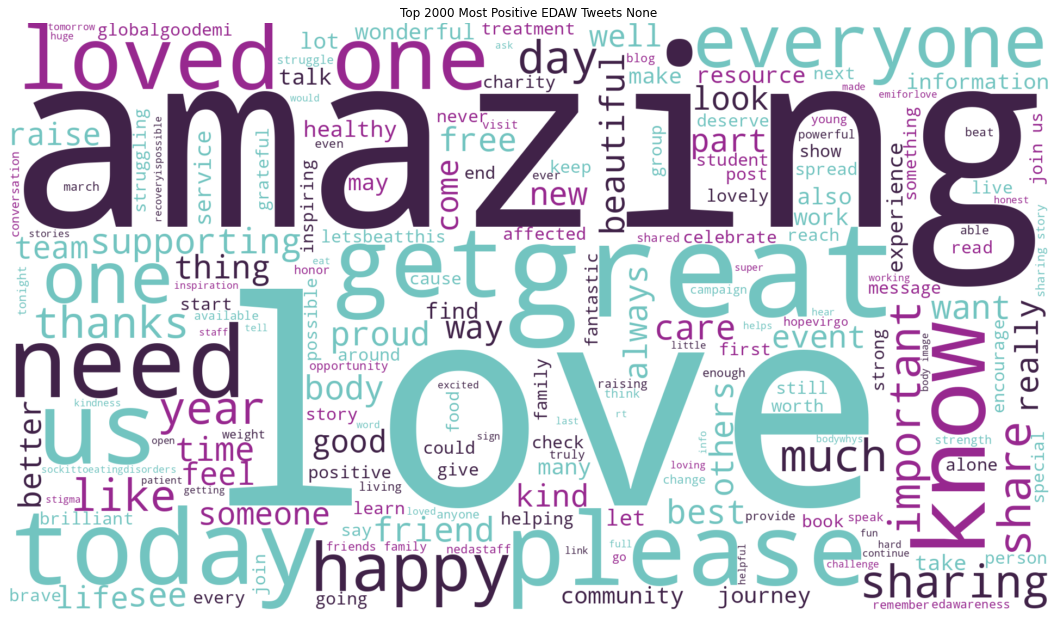

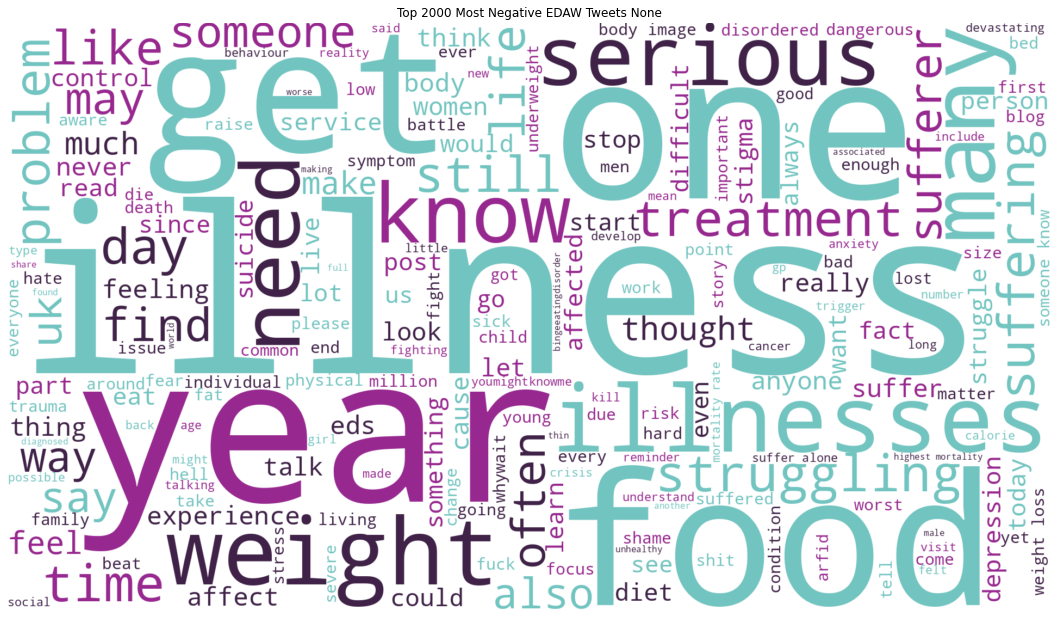

In [30]:
def pos_neg_wc(df, campaign, year= None , custom_stopwords=[]):
     # filter dataframe by campaign and year if year is not None
    if year is not None:
        df = df[(df['campaign'] == campaign) & (df['year'] == year)]
    else:
        df = df[df['campaign'] == campaign]

    #sort scores in order of low to high
    df = df.sort_values(by='compound_score')

    # Extract the top N positive and negative tweets
    top_positive_tweets = df[df['compound_score'] > 0]['processed_tweet'][-2000:]
    top_negative_tweets = df[df['compound_score'] < 0]['processed_tweet'][:2000]
   

    # Join the tweets together into a single string for each group
    positive_tweets_str = ' '.join(top_positive_tweets)
    negative_tweets_str = ' '.join(top_negative_tweets)

    # Set up stopwords
    #nltk.download('stopwords')
    
    
    stopwords = nltk.corpus.stopwords.words('english')
    if custom_stopwords is not None:
        stopwords.extend(custom_stopwords)
        
    #Define a list of colors to use
    colors = ["#97288F","#72C4C0","#402248"]

    def get_word_color(word, *args, **kwargs):
        # Use a hash function to map the word to a color from the list of colors
        hash_value = hash(word)
        color_index = hash_value % len(colors)
        return colors[color_index]  

    # Set the desired image width and height
    #using width and height of 1920 and 1080 to create a 1080p image
    width, height = 1920, 1080
    
    # Create a WordCloud object with the given parameters
    wordcloud = WordCloud(width=width, height=height, background_color='white', stopwords=stopwords,
                          colormap='cool', color_func=get_word_color).generate(positive_tweets_str)
    fig, ax = plt.subplots(figsize=(width/100, height/100))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top 2000 Most Positive {campaign} Tweets {year}')
    plt.show()

    # Create a word cloud for the top negative tweets
    wordcloud = WordCloud(width=width, height=height, background_color='white', stopwords=stopwords,
                          colormap='cool', color_func=get_word_color).generate(negative_tweets_str)
    fig, ax = plt.subplots(figsize=(width/100, height/100))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top 2000 Most Negative {campaign} Tweets {year}')
    plt.show()
    

# In[44]:


pos_neg_wc(df, 'EDAW', year=None, custom_stopwords=['u','edaw','support','disorders','beated','thank','nedawareness',
                                                    'edrecovery','EatingDisorderAwarenessWeek','disordereating','help',
                                                    'recovery','Recovery','Hope','hope','anorexia','bulima','binge','nervosa',
                                                    'https','eatingdisorder','eating','disorder','amp','t','co',
                                  'EatingDisordersAwarenessWeek','awareness','week','s','ED','eatingdisorders',
                                         'MentalHealthAwarenessWeek', 'Mental','Health','mentalhealth','national','people',
                                                   'bulimia'])

In [31]:
#Mapping rating data to Binary label 1 (+ve) if compound >0 and 0 (-ve) if rating <0 and 2 (neutral) if rating ==0
df['Label'] = df['compound_score'].apply(lambda x: '1' if x > 0 else ('0' if x<0 else '2'))
#Removing the neutral tweets
df=df[df.Label<'2']
data=df[['Date', 'ID', 'username', 'source', 'location', 'tweet', 'num_of_likes', 'num_of_rt', 'followers', 'replies', 'campaign', 'processed_tweet', 'year', 'sentiment_scores', 'compound_score', 'Label']]
print(data['Label'].value_counts())

1    490905
0    133123
Name: Label, dtype: int64


In [32]:
df.head()

Date                   ID        username  \
0  2023-02-15 13:48:52+00:00  1625854658601418753    haringeyiapt   
1  2023-02-09 22:37:56+00:00  1623813475469344769   scrupulOCD_KC   
2  2022-10-20 11:30:07+00:00  1583057973496406016  FootstepsCandC   
3  2022-10-18 19:42:14+00:00  1582457044451627008           IOCDF   
4  2022-10-18 19:42:13+00:00  1582457038969262080           IOCDF   

                source    location  \
0   Twitter for iPhone   Haringey    
1  Twitter for Android     unknown   
2         SmarterQueue  Gloucester   
3      Twitter Web App  Boston, MA   
4      Twitter Web App  Boston, MA   

                                               tweet  num_of_likes  num_of_rt  \
0  People with OCD experience intensely negative,...             5          1   
1  Hello all I'm Erika an @IOCDF grassroots advoc...             0          0   
2  In light of last week's OCD Awareness week, we...             0          0   
3  The GIFS now have over 1.4 million views on GI...             5          2   
4  The 2022 #OCDweek events, activities, and live...             7          2   

   followers  replies campaign  \
0        317        0      OCD   
1          9        0      OCD   
2        905        0      OCD   
3      19257        0      OCD   
4      19257        1      OCD   

                                     processed_tweet  year  \
0  people ocd experience intensely negative repet...  2023   
1  hello erika iocdf grassroots advocate loves ro...  2023   
2  light last week ocd awareness week wanted offe...  2022   
3  gifs million views giphy hope campaign shifts ...  2022   
4  ocdweek events activities livestreams led amaz...  2022   

                                    sentiment_scores  compound_score Label  
0  {'neg': 0.242, 'neu': 0.645, 'pos': 0.113, 'co...         -0.8111     0  
1  {'neg': 0.043, 'neu': 0.821, 'pos': 0.136, 'co...          0.6981     1  
2  {'neg': 0.0, 'neu': 0.925, 'pos': 0.075, 'comp...          0.3400     1  
3  {'neg': 0.0, 'neu': 0.848, 'pos': 0.152, 'comp...          0.7840     1  
4  {'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...          0.8689     1

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624028 entries, 0 to 724754
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              624028 non-null  object 
 1   ID                624028 non-null  int64  
 2   username          624028 non-null  object 
 3   source            624028 non-null  object 
 4   location          624028 non-null  object 
 5   tweet             624028 non-null  object 
 6   num_of_likes      624028 non-null  int64  
 7   num_of_rt         624028 non-null  int64  
 8   followers         624028 non-null  int64  
 9   replies           624028 non-null  int64  
 10  campaign          624028 non-null  object 
 11  processed_tweet   624028 non-null  object 
 12  year              624028 non-null  int64  
 13  sentiment_scores  624028 non-null  object 
 14  compound_score    624028 non-null  float64
 15  Label             624028 non-null  object 
dtypes: float64(1), int64

In [34]:
df['Label'] = df['Label'].astype(int)
df.info()

C:\Users\aryan\AppData\Local\Temp/ipykernel_3652/2932420041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['Label'].astype(int)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 624028 entries, 0 to 724754
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              624028 non-null  object 
 1   ID                624028 non-null  int64  
 2   username          624028 non-null  object 
 3   source            624028 non-null  object 
 4   location          624028 non-null  object 
 5   tweet             624028 non-null  object 
 6   num_of_likes      624028 non-null  int64  
 7   num_of_rt         624028 non-null  int64  
 8   followers         624028 non-null  int64  
 9   replies           624028 non-null  int64  
 10  campaign          624028 non-null  object 
 11  processed_tweet   624028 non-null  object 
 12  year              624028 non-null  int64  
 13  sentiment_scores  624028 non-null  object 
 14  compound_score    624028 non-null  float64
 15  Label             624028 non-null  int32  
dtypes: float64(1), int32

In [35]:
df.to_csv('MH Campaign Sentiment Scores Label 17 to 23.csv')

### Feature Engineering

In [36]:
#Importing dependencies for feature engineering 
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer

### Lemmatization

In [37]:
# lemmatization of word, changing words into their roots words
class LemmaTokenizer(object):
    def __init__(self):
        self.wordnetlemma = WordNetLemmatizer()
    def __call__(self, tweet):
        return [self.wordnetlemma.lemmatize(word) for word in word_tokenize(tweet)]

In [38]:
train,test=train_test_split(df,test_size=.2,random_state=135, shuffle=True)
tfidfvect = TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer())
x_train_tfidf = tfidfvect.fit_transform(train['processed_tweet'])
x_test_tfidf = tfidfvect.transform(test['processed_tweet'])

C:\Users\aryan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [39]:
y_train = train['Label']
y_test = test['Label']

### Model Building

In [40]:
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression #found out Logistic regression had the less chance of overfitting and better at generalizing
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, accuracy_score,precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

### Logistic Regression

In [41]:
clf=LogisticRegression()
##model_2=Pipeline(steps=[('vect',TfidfVectorizer(analyzer = "word", tokenizer = LemmaTokenizer())),("classifier", LogisticRegression())])

In [42]:
%%time
clf.fit(x_train_tfidf,y_train)

Wall time: 14.3 s


C:\Users\aryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
%%time
print("Precision Score for Logistic Regression: %s" % precision_score(y_test,clf.predict(x_test_tfidf),average='micro'))
print("Recall Score for Logistic Regression: %s" % recall_score(y_test,clf.predict(x_test_tfidf),average='micro'))
print("AUC Score for Logistic Regression: %s" % roc_auc_score(y_test,clf.predict_proba(x_test_tfidf)[:,1],multi_class='ovo',average='macro'))
f1_score =f1_score(y_test,clf.predict(x_test_tfidf),average="weighted")
print("F1 Score for Logistic Regression: %s" % f1_score)
print("Accuracy Score for Logistic Regression: %s" % accuracy_score(y_test,clf.predict(x_test_tfidf)))

Precision Score for Logistic Regression: 0.9358844927327212
Recall Score for Logistic Regression: 0.9358844927327212
AUC Score for Logistic Regression: 0.9729154788649856
F1 Score for Logistic Regression: 0.9345923067371315
Accuracy Score for Logistic Regression: 0.9358844927327212
Wall time: 288 ms


In [44]:
import pickle

In [45]:
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidfvect,open('tfidf.pkl','wb'))

In [46]:
from preprocessing import clean_tokens

{"isn't", 'will', 'but', 'over', 'of', 'as', 'me', 'once', 'further', 'ain', 'did', 'a', 'here', 'only', 'what', 'or', 'its', 'that', 'shan', 'o', 'by', 'were', 'below', 'won', 'yourself', "needn't", "weren't", 'am', "wasn't", 'more', 'out', 'very', 'who', 'this', 'herself', 'these', 'how', "hadn't", 'own', 'mustn', 'while', 'her', 'll', "haven't", 'isn', "didn't", 'between', 'just', "mustn't", 'yourselves', 'again', "you'd", 'then', 'to', 'there', 'himself', 'any', "couldn't", "doesn't", 'from', 'both', 'been', 'each', 'against', 've', 'they', "that'll", 'i', 'so', "don't", 'whom', 'those', 't', 'you', 'off', 'myself', 'themselves', 'it', 'after', 'all', 'doing', 'ours', 'same', 'other', "you've", 's', 'shouldn', 'wasn', 'hadn', 'y', 'too', 'when', 'is', 'because', 'his', 'my', "wouldn't", 'are', 'in', 'being', 'about', 'weren', "she's", "you'll", 'm', 'most', 'where', 'until', "shan't", 'can', 'under', 'nor', 'we', 'couldn', 'does', 'up', 'and', 'them', 'now', 'has', 'an', 'through',

In [70]:
from preprocessing import clean_tokens
import pickle  # Assuming you're using pickle to load the model

# Load the model only once
with open('tfidf.pkl', 'rb') as f:
    tfidf = pickle.load(f)

with open('clf.pkl', 'rb') as f:
    clf = pickle.load(f)

def prediction(comment):
    # Create a new instance of the model for this prediction
    tfidf_copy = pickle.loads(pickle.dumps(tfidf))
    clf_copy = pickle.loads(pickle.dumps(clf))

    preprocessed_comment = clean_tokens(comment)
    comment_list = [preprocessed_comment]
    comment_vector = tfidf_copy.transform(comment_list)
    prediction = clf_copy.predict(comment_vector)
    print(f"Prediction output: {prediction}")

    return prediction

text = prediction(""" It's challenging to explain the emptiness that comes with depression. The void seems endless. """)



Prediction output: [0]


In [71]:
if text ==0: 
    print("negative comment")
else:
    print("positive comment")

negative comment
